# Load Packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load Data Points (Do not modify the following block)

We have 15 number of data
Coefficients of the original polynomial
w0:-0.467  w1:-0.005  w2:0.281  w3:-0.054  


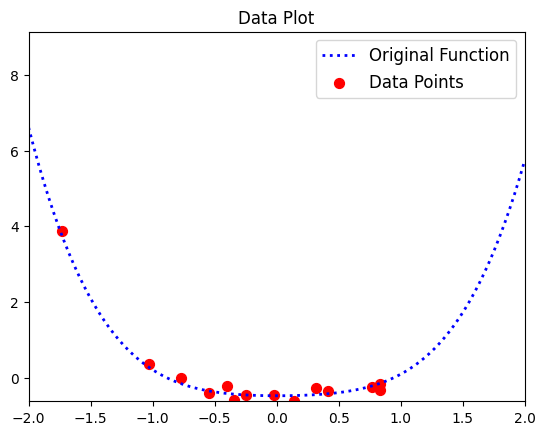

In [2]:
with open('training_data.npz', 'rb') as f:
    data = np.load(f)

    x_list = data['x_list']
    y_list = data['y_list']

    x_data = data['x_data']
    y_data = data['y_data']
    n_data = len(x_data)
    
    w = data['w']
    original_degree = data['order']
    
# Print information of original function.
print("=================================")
print("We have", n_data, "number of data")

print("=================================")
weight_info_string = ''
for d in range(original_degree):
    weight_info_string += 'w'+str(d)+':'+str(round(w[d],ndigits=3))+'  '
print("Coefficients of the original polynomial")
print(weight_info_string)
print("=================================")
    
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

# Polynomial Regression (Programming Assignment)
### Variable Explanation (Do not change variable names)
- 'w' is true coefficients of the original polynomial function
- 'original_degree' is the order of the original polynomial function
- 'x_list' is a list of the points at $x$-axis
- 'y_list' is a list of function value $f(x)$ corresponding to 'x_list'. In other words, y_list = $f($x_list$)$
- 'x_data' is an input data
- 'y_data' is an output data
- 'n_data' is the number of data points

### Our goal is to estimate 'w' from data points, 'x_data' and 'y_data'. Answer the following problems.

### 1. Compute a Vandermonde matrix when the degree of polynomial is $4$ (30pt)
- The variable 'degree' is the order of polynomial. In this problem, we set degree=$4$
- Use the variable 'A' for the Vandermonde matrix. Now, 'A' is initialized as a zero matrix whose elements are all zero. Fill in the element of the Vandermonde matrix by using power operator (\*\*), for loop, and np.concatenation.

In [17]:
degree = 4
A = np.zeros((n_data, degree+1)) # Dummy initialization

A = np.array([x_data**d for d in range(1, degree+1)])
A = np.concatenate([np.ones((1,15)),A]).T

A

array([[ 1.00000000e+00,  7.69458258e-01,  5.92066011e-01,
         4.55570081e-01,  3.50542161e-01],
       [ 1.00000000e+00, -5.48726825e-01,  3.01101129e-01,
        -1.65222266e-01,  9.06618896e-02],
       [ 1.00000000e+00, -3.96088994e-01,  1.56886491e-01,
        -6.21410124e-02,  2.46133711e-02],
       [ 1.00000000e+00, -3.44457358e-01,  1.18650871e-01,
        -4.08701656e-02,  1.40780292e-02],
       [ 1.00000000e+00, -1.73259726e+00,  3.00189326e+00,
        -5.20107204e+00,  9.01136317e+00],
       [ 1.00000000e+00, -1.02635747e+00,  1.05340965e+00,
        -1.08117486e+00,  1.10967189e+00],
       [ 1.00000000e+00,  8.31832735e-01,  6.91945699e-01,
         5.75583083e-01,  4.78788850e-01],
       [ 1.00000000e+00,  4.18095727e-01,  1.74804037e-01,
         7.30848209e-02,  3.05564513e-02],
       [ 1.00000000e+00, -7.73450895e-01,  5.98226287e-01,
        -4.62698657e-01,  3.57874691e-01],
       [ 1.00000000e+00,  1.41388300e-01,  1.99906515e-02,
         2.82644423e-03

### Print results (do not modify the following block)

In [18]:
print(A)

[[ 1.00000000e+00  7.69458258e-01  5.92066011e-01  4.55570081e-01
   3.50542161e-01]
 [ 1.00000000e+00 -5.48726825e-01  3.01101129e-01 -1.65222266e-01
   9.06618896e-02]
 [ 1.00000000e+00 -3.96088994e-01  1.56886491e-01 -6.21410124e-02
   2.46133711e-02]
 [ 1.00000000e+00 -3.44457358e-01  1.18650871e-01 -4.08701656e-02
   1.40780292e-02]
 [ 1.00000000e+00 -1.73259726e+00  3.00189326e+00 -5.20107204e+00
   9.01136317e+00]
 [ 1.00000000e+00 -1.02635747e+00  1.05340965e+00 -1.08117486e+00
   1.10967189e+00]
 [ 1.00000000e+00  8.31832735e-01  6.91945699e-01  5.75583083e-01
   4.78788850e-01]
 [ 1.00000000e+00  4.18095727e-01  1.74804037e-01  7.30848209e-02
   3.05564513e-02]
 [ 1.00000000e+00 -7.73450895e-01  5.98226287e-01 -4.62698657e-01
   3.57874691e-01]
 [ 1.00000000e+00  1.41388300e-01  1.99906515e-02  2.82644423e-03
   3.99626146e-04]
 [ 1.00000000e+00  3.16614871e-01  1.00244977e-01  3.17390503e-02
   1.00490553e-02]
 [ 1.00000000e+00  8.32089704e-01  6.92373276e-01  5.76116675e-01

### 2. Compute the coefficients of polynomial regression using a $4$ degree polynomial  (40pt)
- Use the variable 'degree' and the Vandermonde matrix 'A' in Problem 1.
- The variable 'w_est' is the coefficients of polynomial regression. Now, 'w_est' is initialized as a zero vector. Compute the 'w_est' from 'A' and 'y'
- The variable 'y_est' is an estimated function value corresponding to the input points 'x_list'. Now, it is a zero list and fill the list by computing the estimated function values. In other words, y_est = $\hat{f}($x_list$)$

In [19]:
w_est = np.linalg.pinv(A).dot(y_data)
y_est = w_est[4]*(x_list**4) + w_est[3]*(x_list**3) + w_est[2]*(x_list**2) + w_est[1]*x_list + w_est[0]
y_est

array([ 6.65394358e+00,  6.17255641e+00,  5.71613603e+00,  5.28379198e+00,
        4.87465043e+00,  4.48785424e+00,  4.12256291e+00,  3.77795260e+00,
        3.45321614e+00,  3.14756299e+00,  2.86021931e+00,  2.59042788e+00,
        2.33744816e+00,  2.10055626e+00,  1.87904494e+00,  1.67222363e+00,
        1.47941842e+00,  1.29997206e+00,  1.13324393e+00,  9.78610097e-01,
        8.35463283e-01,  7.03212860e-01,  5.81284860e-01,  4.69121975e-01,
        3.66183552e-01,  2.71945599e-01,  1.85900780e-01,  1.07558418e-01,
        3.64444947e-02, -2.78983522e-02, -8.59108254e-02, -1.38016970e-01,
       -1.84624174e-01, -2.26123166e-01, -2.62888016e-01, -2.95276139e-01,
       -3.23628289e-01, -3.48268564e-01, -3.69504403e-01, -3.87626586e-01,
       -4.02909237e-01, -4.15609821e-01, -4.25969145e-01, -4.34211358e-01,
       -4.40543951e-01, -4.45157757e-01, -4.48226952e-01, -4.49909051e-01,
       -4.50344916e-01, -4.49658745e-01, -4.47958083e-01, -4.45333814e-01,
       -4.41860165e-01, -

### Print results (do not modify the following block)

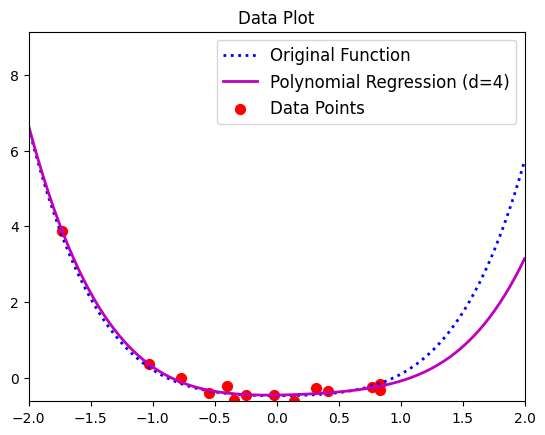

In [20]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(degree))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 3. Compute the polynomial regression with $1$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $1$.
- Use the following variables.
> degree1, A1, w_est1, y_est1

In [21]:
degree1 = 1
A1 = np.zeros((n_data, degree1+1)) 
w_est1 = np.zeros((degree1+1,1))
y_est1 = np.zeros_like(x_list)

A1 = np.array([x_data**d for d in range(1, degree1+1)])
A1 = np.concatenate([np.ones((1,15)),A1]).T
w_est1 = np.linalg.pinv(A1).dot(y_data)
y_est1 = w_est1[1]*x_list + w_est1[0]
w_est1

array([ 0.04199764, -2.19963918])

### Print results (do not modify the following block)

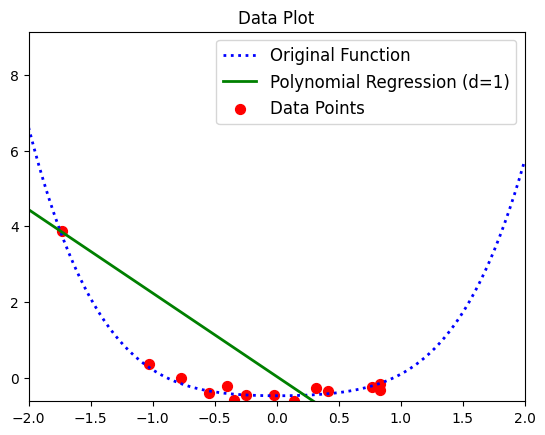

In [22]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(degree1))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 4. Compute the polynomial regression with $10$ degree polynomials (15pt)
- Repeat Problem 1 and Problem 2 with degree $10$.
- Use the following variables.
> degree2, A2, w_est2, y_est2

In [23]:
degree2 = 10
A2 = np.zeros((n_data, degree2+1))

A2 = np.array([x_data**d for d in range(1, degree2+1)])
A2 = np.concatenate([np.ones((1,15)),A2]).T

w_est2 = np.zeros((degree2+1,1))
y_est2 = np.zeros_like(x_list)
w_est2 = np.linalg.pinv(A2).dot(y_data)
for i in range(11):
    y_est2 += w_est2[i]*(x_list**i)
y_est2

array([ 4.73698776e+01,  4.13037262e+01,  3.39287626e+01,  2.62381610e+01,
        1.89009405e+01,  1.23350341e+01,  6.76806818e+00,  2.28739501e+00,
       -1.11921240e+00, -3.53092983e+00, -5.06816326e+00, -5.87270603e+00,
       -6.09284392e+00, -5.87258130e+00, -5.34425556e+00, -4.62389455e+00,
       -3.80875265e+00, -2.97653564e+00, -2.18589323e+00, -1.47782094e+00,
       -8.77670260e-01, -3.97517916e-01, -3.86917756e-02,  2.05706938e-01,
        3.48408393e-01,  4.05796176e-01,  3.96008271e-01,  3.37353962e-01,
        2.47062659e-01,  1.40363155e-01,  2.98776278e-02, -7.46964939e-02,
       -1.66652033e-01, -2.42125962e-01, -2.99786172e-01, -3.40396911e-01,
       -3.66308141e-01, -3.80911834e-01, -3.88104610e-01, -3.91791258e-01,
       -3.95457920e-01, -4.01837144e-01, -4.12680002e-01, -4.28643150e-01,
       -4.49291347e-01, -4.73208784e-01, -4.98205821e-01, -5.21601624e-01,
       -5.40557970e-01, -5.52435354e-01, -5.55139764e-01, -5.47427268e-01,
       -5.29134131e-01, -

### Print results (do not modify the following block)

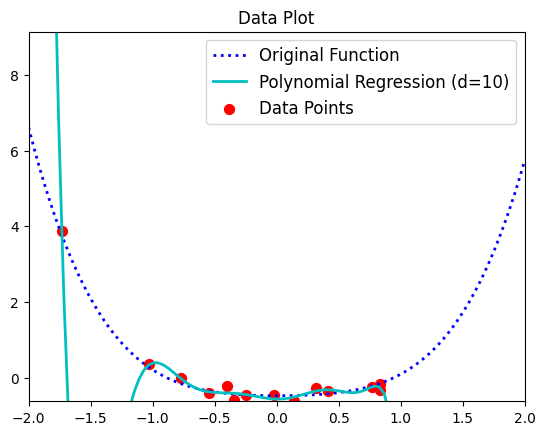

In [24]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(degree2))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

### 5. [Challenging Problem] Explain the effect of degree (20pt)
- By solving the above problems, we can observe the behaviors of polynomial regression with different degrees (1, 4, 10)
- Explain pros and cons of high degree polynomial
- Explain pros and cons of low degree polynomial
- What is this phenomenon called in machine learning?

### The following figure shows all regression results with different degrees.

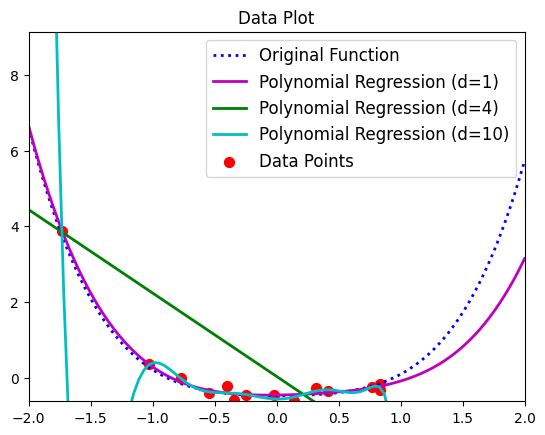

In [25]:
plt.plot(x_list, y_list, 'b:', linewidth=2, label="Original Function")
plt.plot(x_list, y_est, 'm-', linewidth=2, label="Polynomial Regression (d={})".format(1))
plt.plot(x_list, y_est1, 'g-', linewidth=2, label="Polynomial Regression (d={})".format(4))
plt.plot(x_list, y_est2, 'c-', linewidth=2, label="Polynomial Regression (d={})".format(10))
plt.scatter(x_data, y_data, s=50, c='r', label="Data Points")
plt.xlim([np.min(x_list),np.max(x_list)])
plt.ylim([np.min(y_data),np.max(y_data)])
plt.legend(prop={'size': 12})
plt.title("Data Plot")
plt.show()

Write your answer!!!

- Explain pros and cons of high degree polynomial <br>
If degree of polynomial regression is too high, regression model becomes too complicated and exact, but it has low generality.
So this regression model is hard to apply general situation.
<br>

- Explain pros and cons of low degree polynomial <br>
If degree of polynomial regression is too low, regression model becomes linear and it looks so simple to predict given data set.
<br>

- What is this phenomenon called in machine learning? <br>
overfitting, underfitting